In [44]:
!pip install sklearn
!pip install icecream

1. Re-code the Linear-Regression Model using scikit-learning(10 points)

The fit_fuction is: y = 14.45380357327106*x + 5.125350024062581


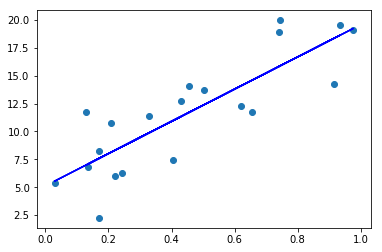

In [48]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

X_data = np.random.random(20)
Y_data = [13.4 * x + 5 + random.randint(-5, 5) for x in X_data]
reg = LinearRegression().fit(X_data.reshape(-1,1), Y_data)
reg.score(X_data.reshape(-1,1), Y_data)
def f(x):
    return reg.coef_*x + reg.intercept_
print("The fit_fuction is: y = {}*x + {}".format(float(reg.coef_), reg.intercept_))
plt.scatter(X_data, Y_data)
plt.plot(X_data, f(X_data), color='blue')

2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

[0.09685196 0.16951955 0.21603456 0.25036642 0.25069536 0.27138126
 0.29434957 0.30052351 0.31536473 0.31695336 0.3396437  0.35760148
 0.3751618  0.37581354 0.44590435 0.46812584 0.48032066 0.51058315
 0.57998033 0.59765494 0.60187178 0.60702034 0.6109326  0.62948463
 0.63107921 0.63372967 0.69593493 0.73018951 0.78081718 0.79298167
 0.79665617 0.81237612 0.84831297 0.8533915  0.85515944 0.87371364
 0.880877   0.90291631 0.94384388 0.9773082 ]


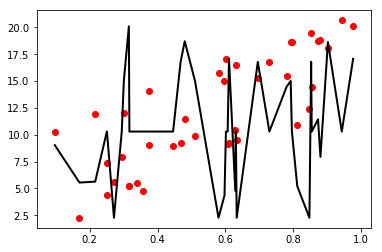

In [40]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
from collections import Counter

%matplotlib inline
X_data = np.random.random(40)
X_data.sort()
y = np.array([13.4 * x + 5 + random.randint(-5, 5) for x in X_data])

#X_data_test = np.random.random(10)
#Y_data_test = np.array([13.4 * x + 5 + random.randint(-5, 5) for x in X_data_test])

def model(X, y):
    return [(X[i], y[i]) for i in range(len(X))]

def distance(x1, x2):
    return cosine(x1, x2)

def predict(xi, k):
    distances = [distance(xi, x) for x in X_data]
    k_neighbors = np.argsort(distances)[:k]
    #predict_y  = np.mean(y[k_neighbors])  ##以最近k个点的平均值作为预测点的y值
    count = Counter(y[k_neighbors])
    predict_y = count.most_common()[0][0]    ##距离最近点作为预测点的y值
    return predict_y

predict_y_list_test = []
for x in X_data:
    predict_y_list_test.append(predict(x,5))
#print(predict_y_list_test)
plt.scatter(X_data, y, color = 'red')
plt.plot(X_data, predict_y_list_test, color='black', lw=2)


3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

In [77]:
from collections import Counter
import numpy as np
import pandas as pd
from icecream import ic
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

def entropy(element): 
    count = Counter(element)
    possibility = [count[a] / len(element) for a in set(element)]
    entropy_1 = -sum(b * np.log(b) for b in possibility)
    return entropy_1

#print(entropy([1, 1, 1, 0]))
    
dataset = pd.DataFrame.from_dict(mock_data)
print(dataset)

def find_min_spliter(training_data, target:str):
    x_params = set(training_data.columns.tolist()) - {target}
    min_spliter = None
    min_entropy = float('inf')
    for variable in x_params:
        ic(variable)
        values = set(training_data[variable])
        ic(values)
        for value in values:
            sub_spliter_1 = training_data[training_data[variable]==value][target].tolist()
            ic(sub_spliter_1)
            entropy_sub_spliter_1 = entropy(sub_spliter_1)
            ic(entropy_sub_spliter_1)
            sub_spliter_2 = training_data[training_data[variable]!=value][target].tolist()
            ic(sub_spliter_2)
            entropy_sub_spliter_2 = entropy(sub_spliter_2)
            ic(entropy_sub_spliter_2)
            value_entropy = entropy_sub_spliter_1 + entropy_sub_spliter_2
            ic(value_entropy)
            
            if value_entropy <= min_entropy:
                min_entropy = value_entropy
                min_spliter = (variable, value)
    print('The spliter is {}'.format(min_spliter))
    print('The min_entrop is {}'.format(min_entropy))
    return min_spliter

find_min_spliter(dataset, target='bought')
print(dataset[dataset['family_number']!=2])
find_min_spliter(dataset[dataset['family_number']!=2],target='bought')

dataset_spliter1 = dataset[dataset['family_number']!=2]
print(dataset_spliter1[dataset_spliter1['income']!='+10'])

ic| variable: 'income'
ic| values: {'-10', '+10'}


  gender income  family_number  bought
0      F    +10              1       1
1      M    -10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              2       0
5      F    +10              1       0
6      M    -10              2       1


ic| sub_spliter_1: [1, 1]
ic| entropy_sub_spliter_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_sub_spliter_2: 0.6730116670092565
ic| value_entropy: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_sub_spliter_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_sub_spliter_2: -0.0
ic| value_entropy: 0.6730116670092565
ic| variable: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0]
ic| entropy_sub_spliter_1: 0.6931471805599453
ic| sub_spliter_2: [1, 0, 1]
ic| entropy_sub_spliter_2: 0.6365141682948128
ic| value_entropy: 1.3296613488547582
ic| sub_spliter_1: [1, 0, 1]
ic| entropy_sub_spliter_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 0, 0]
ic| entropy_sub_spliter_2: 0.6931471805599453
ic| value_entropy: 1.3296613488547582
ic| variable: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [1, 0, 1]
ic| entropy_sub_spliter_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 0, 0]
ic| entropy_sub_spliter_2: 0.6931471805599453
ic| value_entrop

The spliter is ('income', '+10')
The min_entrop is 0.6730116670092565
  gender income  family_number  bought
0      F    +10              1       1
1      M    -10              1       1
3      F    +10              1       0
5      F    +10              1       0


 -0.0
ic| sub_spliter_2: [1, 0, 0]
ic| entropy_sub_spliter_2: 0.6365141682948128
ic| value_entropy: 0.6365141682948128
ic| sub_spliter_1: [1, 0, 0]
ic| entropy_sub_spliter_1: 0.6365141682948128
ic| sub_spliter_2: [1]
ic| entropy_sub_spliter_2: -0.0
ic| value_entropy: 0.6365141682948128
ic| variable: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0]
ic| entropy_sub_spliter_1: 0.6931471805599453
ic| sub_spliter_2: []
ic| entropy_sub_spliter_2: 0
ic| value_entropy: 0.6931471805599453
ic| variable: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [1]
ic| entropy_sub_spliter_1: -0.0
ic| sub_spliter_2: [1, 0, 0]
ic| entropy_sub_spliter_2: 0.6365141682948128
ic| value_entropy: 0.6365141682948128
ic| sub_spliter_1: [1, 0, 0]
ic| entropy_sub_spliter_1: 0.6365141682948128
ic| sub_spliter_2: [1]
ic| entropy_sub_spliter_2: -0.0
ic| value_entropy: 0.6365141682948128


The spliter is ('gender', 'F')
The min_entrop is 0.6365141682948128
  gender income  family_number  bought
1      M    -10              1       1


4. Finish the K-Means using 2-D matplotlib (8 points)

defaultdict(<class 'list'>, {7: [[43, 63], [48, 62], [55, 50], [59, 58], [41, 35], [53, 55], [39, 46], [44, 46], [52, 56], [59, 40], [55, 62], [64, 58], [37, 60], [43, 61], [53, 62], [59, 41], [34, 57]], 2: [[76, 98], [56, 77], [82, 74], [61, 77], [55, 85], [67, 97], [97, 95], [64, 85], [52, 93], [69, 90], [54, 83], [73, 91], [82, 76], [98, 90]], 6: [[81, 22], [86, 31], [67, 30], [84, 18], [65, 18], [66, 19], [70, 10], [65, 28], [61, 15], [68, 16], [95, 0], [81, 26], [80, 27], [82, 28], [79, 17], [81, 29], [66, 7], [80, 20], [93, 15]], 5: [[22, 82], [13, 93], [28, 98], [32, 78], [16, 76], [33, 76], [1, 82], [34, 92], [4, 71], [40, 76], [43, 95], [29, 83], [15, 75], [0, 88], [19, 64]], 3: [[0, 2], [4, 6], [1, 10], [26, 5], [24, 12], [1, 5], [13, 1], [14, 14]], 4: [[36, 17], [51, 11], [55, 24], [44, 0], [32, 13], [35, 6], [54, 3], [36, 3], [49, 14], [43, 23], [38, 19]], 0: [[16, 46], [16, 29], [4, 38], [6, 30], [27, 55], [2, 36], [27, 47], [33, 39]], 1: [[100, 42], [98, 42], [80, 53], [9

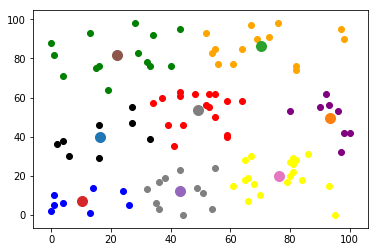

In [25]:
from sklearn.cluster import KMeans
from collections import Counter
from collections import defaultdict
import numpy as np
#import pandas as pd
import random
import matplotlib.pyplot as plt

X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

training_data = [[x, y] for x, y in zip(X, Y)]
cluster = KMeans(n_clusters=8, max_iter=600)
cluster.fit(training_data)
cluster.cluster_centers_
centers = defaultdict(list)
for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'grey', 'black', 'purple']
#print(centers)
for index, value in enumerate(centers):
    for location in centers[value]:
        plt.scatter(*location, c=colors[index])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

# Part-2 Question and Answer 问答

1. What's the model? why all the models are wrong, but some are useful? (5 points)¶

模型是用来利用已知数据来预测未来数据（或是建立数据预测和分类的方法，或根据数据内部之间的联系来建立分类和预测方法）的数学工具（function）。在建立模型过程中，为考虑其数学可实现性、简易性以及其他一些方面的问题，会对模型进行某种程度的简化（相对于复杂的实际问题），因此模型并不能完全代表实际问题（all the models are wrong），但是模型的简化是基于忽略一些对实际问题影响很微小的变量的原则，因此其准确性很高（例如朴素贝叶斯垃圾邮件分类方法会忽略x2，x3，x4...对x1是否垃圾邮件的影响，只考虑spam对其的影响），完全可以应用于工程实际问题（but some are useful）。


2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

欠拟合是指模型在训练集和测试集上表现的都不好（模型过于简单的原因），模型学习能力不足，因此模型误差较大（Bias大，Variance大），很难反应数据的真实分布情况；过拟合是指模型在训练集上效果很好，但是泛化性能较差（Variance大）,在测试集上表现很差。模型过于简单，模型的特征量太少会导致欠拟合；参数太多（模型复杂度高），样本噪音数据干扰大，特征选取错误，学习迭代次数过多会导致过拟合。


3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

precision针对于模型的预测结果而言，指的是：对于二分类问题，例如针对某测试集，有AB两类，模型预测了100个A类（B类），其中98个是对的A类（B类），则模型的precision为98%；

recall针对于测试样本，例如:测试数据集中总共有100个A类（B类），模型能够成功准确预测的A类（B类）有90个，则recall为90%，其一个特点是不受样本不均衡的影响（例如垃圾邮件分类中，500封邮件只有2封垃圾邮件，498封好的邮件，则precision会受到样本不均衡的影响，recall则不会。）

F1为precision和recall的调和平均数，F1=2*precision*recall/(precision+recall),用于兼顾模型的precision和recall（以更全面评价模型的优劣），且可通过系数来调整两者的权重(Fα=(α^2+1)*precision/(α^2*precision+recall)),F2的意思是recall的权重高于precision；

AUC用来评价模型性能优劣以及找到最佳指标值的阈值，例如：在a个A类样本中，分类模型准确分类出a1个A类样本，在b个B类样本，分类模型准确分类出b1个B类样本，则分类模型的AUC=(a1/a)*(b1/b)。同样，recall不受样本不均衡的影响，其值越接近1，则分类模型性能越好。


4. Based on our course and yourself mind, what's the machine learning? (8')

机器学习是针对一些已经获得的学习样本数据和测试数据，来训练学习得到某个模型（即某个逻辑加工过程），该模型能够准确预测未来数据，或者对数据进行分类并能够准确找到未知数据的类别。机器学习过程可分为有监督和无监督学习，无监督学习是指不需要给数据任何标签，而只是根据数据内部之间的关系，对其进行分类和分类预测（KNN，聚类等问题），有监督学习则是指：我们提前知道一些输入数据集，并知道他们应该的输出，机器学习的目的就是找到输入输出的关系（线性回归，决策树等问题）。

5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

这句话突出了评价标准对于机器学习模型的重要性。机器学习模型的评价标准有很多种，包括：误差、准确率、精确率、召回率、F值、ROC-AUC、PRC-AUC等。因此要评价模型的性能优劣，需要根据具体的训练集数据特点和预测模型要求等来选择，例如：我们最常用也最直观的指标是准确率，但是准确率在评价某些模型时会存在较大“欺骗性”（特别是样本数据很不均衡时），邮件分类问题，如果预测样本数据集中有500封邮件，其中495封垃圾邮件，5封正常邮件，那么即使模型将全部5封正常邮件分类为垃圾邮件，模型的垃圾邮件预测准确率也很高，如果我们更关注5封正常邮件的分类，则会带来很大困扰，因此该模型还需要recall，Fα或者AUC等指标来综合评价。综上，评价标准对于正确评价机器学习模型的重要性不言而喻，需要根据数据集特点和其他条件，综合评价指标，得到更好的结果。
   


# Part-03 Programming Practice 编程练习

1.In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a completed Decision Tree Model. You show finish a predicate() function, which accepts three parameters <gender, income, family_number>, and outputs the predicated 'bought': 1 or 0. (20 points)

In [61]:
from collections import Counter
import numpy as np
import pandas as pd
#from icecream import ic
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}


def entropy(element): 
    count = Counter(element)
    possibility = [count[a] / len(element) for a in set(element)]
    entropy_1 = -sum(b * np.log(b) for b in possibility)
    return entropy_1

#print(entropy([1, 1, 1, 0]))
dataset = pd.DataFrame.from_dict(mock_data)
variables = dataset.columns.tolist()

def find_min_spliter(training_data, target:str):
    x_params = set(training_data.columns.tolist()) - {target}
    min_spliter = None
    min_entropy = float('inf')
    for variable in x_params:
        #ic(variable)
        values = set(training_data[variable])
        #ic(values)
        for value in values:
            sub_spliter_1 = training_data[training_data[variable]==value][target].tolist()
            #ic(sub_spliter_1)
            entropy_sub_spliter_1 = entropy(sub_spliter_1)
            #ic(entropy_sub_spliter_1)
            sub_spliter_2 = training_data[training_data[variable]!=value][target].tolist()
            #ic(sub_spliter_2)
            entropy_sub_spliter_2 = entropy(sub_spliter_2)
            #ic(entropy_sub_spliter_2)
            value_entropy = entropy_sub_spliter_1 + entropy_sub_spliter_2
            #ic(value_entropy)
            
            if value_entropy <= min_entropy:
                min_entropy = value_entropy
                min_spliter = (variable, value)
    #print('The spliter is {}'.format(min_spliter))
    #print('The min_entrop is {}'.format(min_entropy))
    return min_spliter

def majority_label(label_list):
    count = Counter(label_list)
    return count.most_common()[0][0]


def Decision_tree(dataset):
    labels = [dataset.values[i][-1] for i in range(dataset.shape[0])]
    variables = dataset.columns.tolist()
    target = variables[-1]
    if len(variables) == 1:
        return labels[0]
    if len(set(labels)) == 1:  
        return dataset.values[0][-1]
    min_spliter = find_min_spliter(dataset, target)
    min_spliter_variable = min_spliter[0]
    min_spliter_value = min_spliter[1]
    min_spliter_values = dataset[min_spliter_variable].values.tolist()
    label_list = []
    for i in range(len(min_spliter_values)):
        if min_spliter_values[i] == min_spliter_value:
            label_list.append(dataset[target].values.tolist()[i])
    decisi_tree = {min_spliter_variable:{}}
    dataset_next = dataset[dataset[min_spliter_variable]!=min_spliter_value].drop([min_spliter_variable], axis=1)
    for value in set(min_spliter_values):
        if value == min_spliter_value:
            decisi_tree[min_spliter_variable][value] = majority_label(label_list)
        else:
            decisi_tree[min_spliter_variable][value] = Decision_tree(dataset_next)
    return decisi_tree

decision_tree = Decision_tree(dataset)
print(decision_tree)
#find_min_spliter(dataset, target='bought')
#print(dataset[dataset['income']=='-10'])
#find_min_spliter(dataset[dataset['income']=='-10'],target='bought')

#dataset_spliter1 = dataset[dataset['income']=='-10']
#print(dataset_spliter1[dataset_spliter1['family_number']==1])
#dataset_spliter1[dataset_spliter1['gender'] == 'F']
#find_min_spliter(dataset_spliter1[dataset_spliter1['income']=='-10'],target='bought')

def predicate(deci_tree, test_variables):
    first_spliter_variable = list(deci_tree.keys())[0]
    dicts = deci_tree[first_spliter_variable]
    x_variables = dataset.columns.tolist()[:-1]
    variable_index = x_variables.index(first_spliter_variable)
    for key in dicts.keys():
        if test_variables[variable_index] == key:
            if type(dicts[key]).__name__ == 'dict':
                predicate_label = predicate(dicts[key], test_variables)
            else:
                predicate_label = dicts[key]
                
    return predicate_label

predicate(decision_tree, ['M', '-10', 1])

{'family_number': {1: {'income': {'+10': {'gender': {'M': 0, 'F': 1}}, '-10': 1}}, 2: 1}}


1

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。

Iteration 0, the loss is 251428.27931664474, parameters k is 81.66093258968979 and b is 6.217533909320693
Iteration 1, the loss is 17095.61794690761, parameters k is 18.06043258968971 and b is -57.38296609067939
Iteration 2, the loss is 214744.18707935585, parameters k is -44.80930741031038 and b is -120.25270609067948
Iteration 3, the loss is 19764.163087775054, parameters k is 18.7911925896897 and b is -56.6522060906794
Iteration 4, the loss is 212916.80332535607, parameters k is -44.31354741031039 and b is -119.75694609067949
Iteration 5, the loss is 21576.283382895002, parameters k is 19.28695258968969 and b is -56.15644609067941
Iteration 6, the loss is 211089.41957135624, parameters k is -43.8177874103104 and b is -119.2611860906795
Iteration 7, the loss is 23388.403678014998, parameters k is 19.78271258968968 and b is -55.66068609067942
Iteration 8, the loss is 209262.03581735634, parameters k is -43.32202741031041 and b is -118.76542609067951
Iteration 9, the loss is 25200.6656

Iteration 83, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 84, the loss is 200763.24169535644, parameters k is -41.01634741031043 and b is -116.45974609067957
Iteration 85, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 86, the loss is 200763.24169535644, parameters k is -41.01634741031043 and b is -116.45974609067957
Iteration 87, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 88, the loss is 200763.24169535644, parameters k is -41.01634741031043 and b is -116.45974609067957
Iteration 89, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 90, the loss is 200763.24169535644, parameters k is -41.01634741031043 and b is -116.45974609067957
Iteration 91, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 92, the loss is

Iteration 195, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 196, the loss is 200763.24169535644, parameters k is -41.01634741031043 and b is -116.45974609067957
Iteration 197, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 198, the loss is 200763.24169535644, parameters k is -41.01634741031043 and b is -116.45974609067957
Iteration 199, the loss is 33669.79131714403, parameters k is 22.58415258968965 and b is -52.85924609067949
Iteration 0, the loss is 16556.801294775178, parameters k is -5.291949482432273 and b is 88.27219415225323
Iteration 1, the loss is 91805.59448408174, parameters k is -34.65723948243231 and b is 58.9069041522532
Iteration 2, the loss is 25410.92202216846, parameters k is -2.856989482432269 and b is 90.70715415225324
Iteration 3, the loss is 91805.59448408174, parameters k is -34.65723948243231 and b is 58.9069041522532
Iteration 4, the loss is 25410.

Iteration 172, the loss is 25410.92202216846, parameters k is -2.856989482432269 and b is 90.70715415225324
Iteration 173, the loss is 91805.59448408174, parameters k is -34.65723948243231 and b is 58.9069041522532
Iteration 174, the loss is 25410.92202216846, parameters k is -2.856989482432269 and b is 90.70715415225324
Iteration 175, the loss is 91805.59448408174, parameters k is -34.65723948243231 and b is 58.9069041522532
Iteration 176, the loss is 25410.92202216846, parameters k is -2.856989482432269 and b is 90.70715415225324
Iteration 177, the loss is 91805.59448408174, parameters k is -34.65723948243231 and b is 58.9069041522532
Iteration 178, the loss is 25410.92202216846, parameters k is -2.856989482432269 and b is 90.70715415225324
Iteration 179, the loss is 91805.59448408174, parameters k is -34.65723948243231 and b is 58.9069041522532
Iteration 180, the loss is 25410.92202216846, parameters k is -2.856989482432269 and b is 90.70715415225324
Iteration 181, the loss is 91805

Iteration 52, the loss is 11237.85113289561, parameters k is -10.544715031477555 and b is 108.03216126281023
Iteration 53, the loss is 8380.024813562717, parameters k is -15.065937031477556 and b is 103.51093926281024
Iteration 54, the loss is 11293.276071870054, parameters k is -10.523807031477556 and b is 108.05306926281024
Iteration 55, the loss is 8399.937197642725, parameters k is -15.07356903147756 and b is 103.50330726281024
Iteration 56, the loss is 11272.96822807805, parameters k is -10.53143903147756 and b is 108.04543726281024
Iteration 57, the loss is 8419.849581722741, parameters k is -15.081201031477564 and b is 103.49567526281024
Iteration 58, the loss is 11252.777317379585, parameters k is -10.539071031477565 and b is 108.03780526281024
Iteration 59, the loss is 8365.359538353841, parameters k is -15.060293031477567 and b is 103.51658326281023
Iteration 60, the loss is 11248.165115795593, parameters k is -10.540815031477567 and b is 108.03606126281022
Iteration 61, the 

Iteration 154, the loss is 11248.302635567248, parameters k is -10.540763031477695 and b is 108.03611326281009
Iteration 155, the loss is 8369.751528742188, parameters k is -15.061985031477697 and b is 103.5148912628101
Iteration 156, the loss is 11243.690433983256, parameters k is -10.542507031477697 and b is 108.03436926281009
Iteration 157, the loss is 8374.2784975582, parameters k is -15.063729031477699 and b is 103.5131472628101
Iteration 158, the loss is 11239.078232399233, parameters k is -10.5442510314777 and b is 108.03262526281009
Iteration 159, the loss is 8378.814207403095, parameters k is -15.065473031477701 and b is 103.51140326281009
Iteration 160, the loss is 11294.51072065367, parameters k is -10.523343031477701 and b is 108.05353326281009
Iteration 161, the loss is 8398.726591483106, parameters k is -15.073105031477704 and b is 103.50377126281009
Iteration 162, the loss is 11274.202876861666, parameters k is -10.530975031477706 and b is 108.04590126281009
Iteration 16

Iteration 95, the loss is 5244.568693768644, parameters k is 19.25317913916469 and b is -90.0642672735885
Iteration 96, the loss is 5646.072570669806, parameters k is 16.68134613916469 and b is -92.6361002735885
Iteration 97, the loss is 5268.850975768272, parameters k is 19.26133513916469 and b is -90.0561112735885
Iteration 98, the loss is 5656.932530849803, parameters k is 16.677726139164687 and b is -92.6397202735885
Iteration 99, the loss is 5258.0720311882715, parameters k is 19.257715139164688 and b is -90.0597312735885
Iteration 100, the loss is 5667.792491029817, parameters k is 16.674106139164685 and b is -92.64334027358849
Iteration 101, the loss is 5247.29308660827, parameters k is 19.254095139164686 and b is -90.0633512735885
Iteration 102, the loss is 5678.652451209813, parameters k is 16.670486139164684 and b is -92.64696027358849
Iteration 103, the loss is 5236.554489336638, parameters k is 19.250475139164685 and b is -90.06697127358849
Iteration 104, the loss is 5654.1

(16.67865613916463, -92.63879027358844)

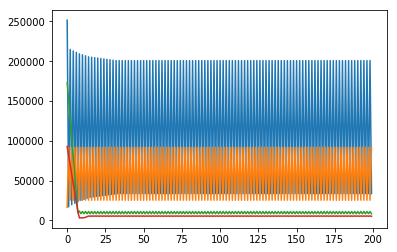

In [47]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
import math
import numpy as np

dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

def target_func(x, k, b):
    return (k*x+b)


def loss_func(y, y_hat):
    #return abs(sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y)))
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))
                                                                                                                                                                        
def partial_derivative_k(x, y, y_hat):
    gradient = 0
    k_gradie = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i > y_hat_i:
            k_gradie = -x_i
        else:
            k_gradie = x_i
        gradient += k_gradie
    return gradient
                                                                                    

def partial_derivative_b(x, y, y_hat):                                                                                 
    gradient = 0
    b_gradie = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i > y_hat_i:
            b_gradie = -1
        else:
            b_gradie = 1
        gradient += b_gradie
    return gradient

def linear_regression(data_x, data_y, learning_rate, iteration_num):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    losses=[]
    for i in range(iteration_num):
        price_use_current_y_hat = [target_func(x_i, k, b) for x_i in data_x]
        current_loss = loss_func(data_y, price_use_current_y_hat)
        losses.append(current_loss)
        
        print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
        
        k_gradient = partial_derivative_k(data_x, data_y, price_use_current_y_hat)
        b_gradient = partial_derivative_b(data_x, data_y, price_use_current_y_hat)
        
        k = k - learning_rate * k_gradient
        b = b - learning_rate * k_gradient
        
    plt.plot(list(range(iteration_num)),losses)
    return k, b

linear_regression(X_rm, y, 0.02, 200)
linear_regression(X_rm, y, 0.01, 200)
linear_regression(X_rm, y, 0.002, 200)
linear_regression(X_rm, y, 0.001, 200)

##Loss function不能完全收敛，但是当learning_rate较小时，Loss function会不断减小，最终在某个值上下很小范围
##内来回震荡波动，但此时k和b的取值并不唯一;learning_rate越大，其震荡幅度会不断增大，以至于完全不能呈现
##“减小-震荡”的趋势，呈现“发散震荡”的规律。